In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
df=pd.read_csv('TweetSentiment.csv')
df.head()

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0,yes,1.0,Positive,1.0000,None of the above,0.7039,NaN,...,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0,yes,1.0,Positive,0.7045,None of the above,1.0000,NaN,...,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona


In [2]:
df.shape

(13871, 21)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13871 entries, 0 to 13870
Data columns (total 21 columns):
id                           13871 non-null int64
candidate                    13775 non-null object
candidate_confidence         13871 non-null float64
relevant_yn                  13871 non-null object
relevant_yn_confidence       13871 non-null float64
sentiment                    13871 non-null object
sentiment_confidence         13871 non-null float64
subject_matter               13545 non-null object
subject_matter_confidence    13871 non-null float64
candidate_gold               28 non-null object
name                         13871 non-null object
relevant_yn_gold             32 non-null object
retweet_count                13871 non-null int64
sentiment_gold               15 non-null object
subject_matter_gold          18 non-null object
text                         13871 non-null object
tweet_coord                  21 non-null object
tweet_created                13871 no

In [4]:
df.describe()

,id,candidate_confidence,relevant_yn_confidence,sentiment_confidence,subject_matter_confidence,retweet_count,tweet_id
count,13871.000000,13871.000000,13871.000000,13871.000000,13871.000000,13871.000000,1.387100e+04
mean,6936.000000,0.855689,0.927304,0.756936,0.782801,45.803331,6.296058e+17
std,4004.357127,0.241388,0.141696,0.217682,0.258215,153.981724,9.611863e+13
min,1.000000,0.222200,0.333300,0.186000,0.222200,0.000000,6.294531e+17
25%,3468.500000,0.674200,1.000000,0.651700,0.641300,0.000000,6.294861e+17
50%,6936.000000,1.000000,1.000000,0.681300,1.000000,2.000000,6.296726e+17
75%,10403.500000,1.000000,1.000000,1.000000,1.000000,44.000000,6.296882e+17
max,13871.000000,1.000000,1.000000,1.000000,1.000000,4965.000000,6.297017e+17


In [8]:
df['text_length']=df['text'].apply(len)

In [30]:
sent=df['sentiment'].value_counts()
print(sent)

Negative    8493
Neutral     3142
Positive    2236
Name: sentiment, dtype: int64


In [33]:
df.groupby(['sentiment'])['text_length'].mean()

sentiment
Negative    117.199223
Neutral     107.505729
Positive    113.880590
Name: text_length, dtype: float64

In [34]:
df['tweet_location'].value_counts()

USA                            239
Washington, DC                 128
New York, NY                   120
Texas                           88
New York                        75
United States                   75
Los Angeles                     65
America                         63
Los Angeles, CA                 62
California, USA                 56
Viva Las Vegas NV.              55
Florida                         53
California                      52
Chicago                         47
Austin, TX                      43
Chicago, IL                     43
NYC                             43
Seattle, WA                     38
Atlanta, GA                     38
Boston, MA                      38
Boston                          36
Los Angeles                     36
Heaven                          34
New York City                   34
Ellicott City, Maryland         33
Cocoa Beach, Florida            33
Georgia                         33
Washington, D.C.                31
Colorado            

In [35]:
df=df.drop(['id', 'candidate','candidate_confidence','tweet_id','user_timezone'], axis=1)

In [36]:
df.isnull().sum()

relevant_yn                      0
relevant_yn_confidence           0
sentiment                        0
sentiment_confidence             0
subject_matter                 326
subject_matter_confidence        0
candidate_gold               13843
name                             0
relevant_yn_gold             13839
retweet_count                    0
sentiment_gold               13856
subject_matter_gold          13853
text                             0
tweet_coord                  13850
tweet_created                    0
tweet_location                3912
text_length                      0
dtype: int64

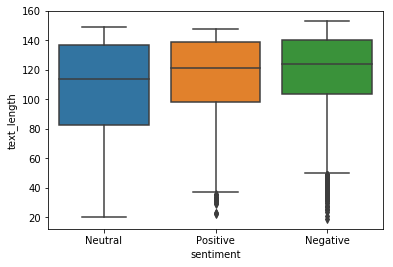

In [37]:
sns.boxplot(x='sentiment', y='text_length', data=df)

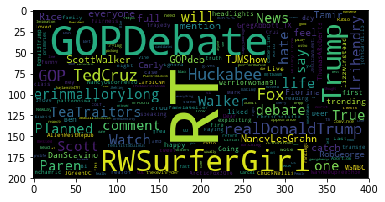

In [38]:
from wordcloud import WordCloud
wordcloud=WordCloud().generate(str(df['text']))
plt.imshow(wordcloud)
plt.show()

In [39]:
df.sentiment[df.sentiment=='Negative'] = int(-1)
df.sentiment[df.sentiment=='Neutral'] = int(0)
df.sentiment[df.sentiment=='Positive'] = int(1)
df.head()

C:\Users\Harsh\.LSC\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Harsh\.LSC\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Harsh\.LSC\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,name,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_location,text_length
0,yes,1.0,0,0.6578,None of the above,1.0000,NaN,I_Am_Kenzi,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,NaN,106
1,yes,1.0,1,0.6333,None of the above,1.0000,NaN,PeacefulQuest,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,NaN,140
2,yes,1.0,0,0.6629,None of the above,0.6629,NaN,PussssyCroook,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,NaN,84
3,yes,1.0,1,1.0000,None of the above,0.7039,NaN,MattFromTexas31,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,Texas,140
4,yes,1.0,1,0.7045,None of the above,1.0000,NaN,sharonDay5,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,NaN,140


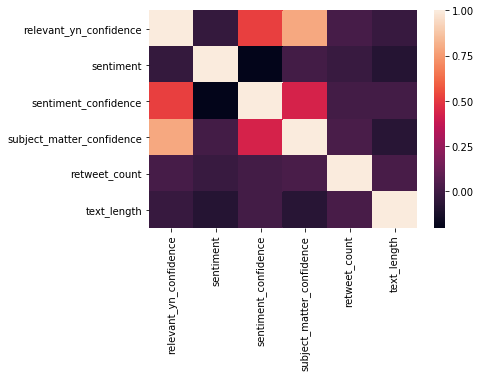

In [40]:
#To check relevance of features, other than text, on sentiment
df.sentiment=pd.to_numeric(df['sentiment'])
sns.heatmap(df.corr())
plt.show()

In [41]:
###Now let us pre-process the text
#Lower Case
df['text']=df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df.head()

,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,name,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_location,text_length
0,yes,1.0,0,0.6578,None of the above,1.0000,NaN,I_Am_Kenzi,NaN,5,NaN,NaN,rt @nancyleegrahn: how did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,NaN,106
1,yes,1.0,1,0.6333,None of the above,1.0000,NaN,PeacefulQuest,NaN,26,NaN,NaN,rt @scottwalker: didn't catch the full #gopdeb...,NaN,2015-08-07 09:54:46 -0700,NaN,140
2,yes,1.0,0,0.6629,None of the above,0.6629,NaN,PussssyCroook,NaN,27,NaN,NaN,rt @tjmshow: no mention of tamir rice and the ...,NaN,2015-08-07 09:54:46 -0700,NaN,84
3,yes,1.0,1,1.0000,None of the above,0.7039,NaN,MattFromTexas31,NaN,138,NaN,NaN,rt @robgeorge: that carly fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,Texas,140
4,yes,1.0,1,0.7045,None of the above,1.0000,NaN,sharonDay5,NaN,156,NaN,NaN,rt @danscavino: #gopdebate w/ @realdonaldtrump...,NaN,2015-08-07 09:54:45 -0700,NaN,140


In [42]:
#No Punctuations
from string import punctuation
def removpunc(data):
    return ''.join(k for k in data if k not in punctuation)
removpunc(df['text'])
df.head()

,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,name,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_location,text_length
0,yes,1.0,0,0.6578,None of the above,1.0000,NaN,I_Am_Kenzi,NaN,5,NaN,NaN,rt @nancyleegrahn: how did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,NaN,106
1,yes,1.0,1,0.6333,None of the above,1.0000,NaN,PeacefulQuest,NaN,26,NaN,NaN,rt @scottwalker: didn't catch the full #gopdeb...,NaN,2015-08-07 09:54:46 -0700,NaN,140
2,yes,1.0,0,0.6629,None of the above,0.6629,NaN,PussssyCroook,NaN,27,NaN,NaN,rt @tjmshow: no mention of tamir rice and the ...,NaN,2015-08-07 09:54:46 -0700,NaN,84
3,yes,1.0,1,1.0000,None of the above,0.7039,NaN,MattFromTexas31,NaN,138,NaN,NaN,rt @robgeorge: that carly fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,Texas,140
4,yes,1.0,1,0.7045,None of the above,1.0000,NaN,sharonDay5,NaN,156,NaN,NaN,rt @danscavino: #gopdebate w/ @realdonaldtrump...,NaN,2015-08-07 09:54:45 -0700,NaN,140


In [43]:
#No Stop-Words
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
df['text']=[t for t in df['text'] if t not in stop_words]
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,name,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_location,text_length
0,yes,1.0,0,0.6578,None of the above,1.0000,NaN,I_Am_Kenzi,NaN,5,NaN,NaN,rt @nancyleegrahn: how did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,NaN,106
1,yes,1.0,1,0.6333,None of the above,1.0000,NaN,PeacefulQuest,NaN,26,NaN,NaN,rt @scottwalker: didn't catch the full #gopdeb...,NaN,2015-08-07 09:54:46 -0700,NaN,140
2,yes,1.0,0,0.6629,None of the above,0.6629,NaN,PussssyCroook,NaN,27,NaN,NaN,rt @tjmshow: no mention of tamir rice and the ...,NaN,2015-08-07 09:54:46 -0700,NaN,84
3,yes,1.0,1,1.0000,None of the above,0.7039,NaN,MattFromTexas31,NaN,138,NaN,NaN,rt @robgeorge: that carly fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,Texas,140
4,yes,1.0,1,0.7045,None of the above,1.0000,NaN,sharonDay5,NaN,156,NaN,NaN,rt @danscavino: #gopdebate w/ @realdonaldtrump...,NaN,2015-08-07 09:54:45 -0700,NaN,140


In [44]:
#Sentiment Analysis
from textblob import TextBlob
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity
sent = lambda x: TextBlob(x).sentiment

In [45]:
df['polarity']=df['text'].apply(pol)
df['subjectivity']=df['text'].apply(sub)
df['tblob_sentiment']=df['text'].apply(sent)

In [46]:
df.head()

,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,name,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_location,text_length,polarity,subjectivity,tblob_sentiment
0,yes,1.0,0,0.6578,None of the above,1.0000,NaN,I_Am_Kenzi,NaN,5,NaN,NaN,rt @nancyleegrahn: how did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,NaN,106,0.125,0.158333,"(0.125, 0.15833333333333333)"
1,yes,1.0,1,0.6333,None of the above,1.0000,NaN,PeacefulQuest,NaN,26,NaN,NaN,rt @scottwalker: didn't catch the full #gopdeb...,NaN,2015-08-07 09:54:46 -0700,NaN,140,0.450,0.305556,"(0.45, 0.3055555555555556)"
2,yes,1.0,0,0.6629,None of the above,0.6629,NaN,PussssyCroook,NaN,27,NaN,NaN,rt @tjmshow: no mention of tamir rice and the ...,NaN,2015-08-07 09:54:46 -0700,NaN,84,0.100,1.000000,"(0.1, 1.0)"
3,yes,1.0,1,1.0000,None of the above,0.7039,NaN,MattFromTexas31,NaN,138,NaN,NaN,rt @robgeorge: that carly fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,Texas,140,0.000,0.100000,"(0.0, 0.1)"
4,yes,1.0,1,0.7045,None of the above,1.0000,NaN,sharonDay5,NaN,156,NaN,NaN,rt @danscavino: #gopdebate w/ @realdonaldtrump...,NaN,2015-08-07 09:54:45 -0700,NaN,140,0.000,0.000000,"(0.0, 0.0)"


In [48]:
#Summarizing Reviews using LexRank
import sumy
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lex_rank import LexRankSummarizer
parser=PlaintextParser.from_string(df['text'], Tokenizer("english"))
summarizer=LexRankSummarizer()
summary=summarizer(parser.document,1)
for sentence in summary:
    print(sentence)

0        rt @nancyleegrahn: how did everyone feel about... 1        rt @scottwalker: didn't catch the full #gopdeb... 2        rt @tjmshow: no mention of tamir rice and the ... 3        rt @robgeorge: that carly fiorina is trending ... 4        rt @danscavino: #gopdebate w/ @realdonaldtrump... 5        rt @gregabbott_tx: @tedcruz: "on my first day ... 6        rt @warriorwoman91: i liked her and was happy ... 7        going on #msnbc live with @thomasaroberts arou... 8        deer in the headlights rt @lizzwinstead: ben c... 9        rt @nancyosborne180: last night's debate prove... 10       @jgreendc @realdonaldtrump in all fairness #bi... 11       rt @waynedupreeshow: just woke up to tweet thi... 12       me reading my family's comments about how grea... 13       rt @arcticfox2016: rt @allenwestrepub "dear @j... 14       rt @pattonoswalt: i loved scott walker as mark... 15       hey @chrischristie exploiting the tragedy of 9... 16       rt @carolcnn: #donaldtrump under fire for comm.

In [49]:
#Summarizing Reviews using LuhnSummarizer
from sumy.summarizers.luhn import LuhnSummarizer
luhn_summarizer=LuhnSummarizer()
l_summary=luhn_summarizer(parser.document,1)
for sentence1 in l_summary:
    print(sentence1)

0        rt @nancyleegrahn: how did everyone feel about... 1        rt @scottwalker: didn't catch the full #gopdeb... 2        rt @tjmshow: no mention of tamir rice and the ... 3        rt @robgeorge: that carly fiorina is trending ... 4        rt @danscavino: #gopdebate w/ @realdonaldtrump... 5        rt @gregabbott_tx: @tedcruz: "on my first day ... 6        rt @warriorwoman91: i liked her and was happy ... 7        going on #msnbc live with @thomasaroberts arou... 8        deer in the headlights rt @lizzwinstead: ben c... 9        rt @nancyosborne180: last night's debate prove... 10       @jgreendc @realdonaldtrump in all fairness #bi... 11       rt @waynedupreeshow: just woke up to tweet thi... 12       me reading my family's comments about how grea... 13       rt @arcticfox2016: rt @allenwestrepub "dear @j... 14       rt @pattonoswalt: i loved scott walker as mark... 15       hey @chrischristie exploiting the tragedy of 9... 16       rt @carolcnn: #donaldtrump under fire for comm.

In [50]:
#Increasing length of summary
from sumy.summarizers.luhn import LuhnSummarizer
luhn_summarizer=LuhnSummarizer()
l_summary=luhn_summarizer(parser.document,5)
for sentence1 in l_summary:
    print(sentence1)

0        rt @nancyleegrahn: how did everyone feel about... 1        rt @scottwalker: didn't catch the full #gopdeb... 2        rt @tjmshow: no mention of tamir rice and the ... 3        rt @robgeorge: that carly fiorina is trending ... 4        rt @danscavino: #gopdebate w/ @realdonaldtrump... 5        rt @gregabbott_tx: @tedcruz: "on my first day ... 6        rt @warriorwoman91: i liked her and was happy ... 7        going on #msnbc live with @thomasaroberts arou... 8        deer in the headlights rt @lizzwinstead: ben c... 9        rt @nancyosborne180: last night's debate prove... 10       @jgreendc @realdonaldtrump in all fairness #bi... 11       rt @waynedupreeshow: just woke up to tweet thi... 12       me reading my family's comments about how grea... 13       rt @arcticfox2016: rt @allenwestrepub "dear @j... 14       rt @pattonoswalt: i loved scott walker as mark... 15       hey @chrischristie exploiting the tragedy of 9... 16       rt @carolcnn: #donaldtrump under fire for comm.